In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('C:/Users/Wind/TrafficSign-Classification-CNN/')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [4]:
data = []
labels = []
# 43 classes
classes = 43
cur_path = os.getcwd()

In [5]:
cur_path

'C:\\Users\\Wind\\TrafficSign-Classification-CNN'

In [6]:
# Xử lý ảnh trước khi training
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [7]:
#covert list - array
data = np.array(data)
labels = np.array(labels)

In [8]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [9]:
# load model
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [10]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [13]:
#Convert labels to onehot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [14]:
#Build model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [15]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 [==============================] - 27s 27ms/step - loss: 1.8884 - accuracy: 0.5059 - val_loss: 0.5921 - val_accuracy: 0.8409
Epoch 2/20
981/981 [==============================] - 27s 27ms/step - loss: 0.7623 - accuracy: 0.7748 - val_loss: 0.2501 - val_accuracy: 0.9311
Epoch 3/20
981/981 [==============================] - 25s 25ms/step - loss: 0.4472 - accuracy: 0.8667 - val_loss: 0.1593 - val_accuracy: 0.9551
Epoch 4/20
981/981 [==============================] - 26s 26ms/step - loss: 0.3378 - accuracy: 0.9004 - val_loss: 0.1204 - val_accuracy: 0.9684
Epoch 5/20
981/981 [==============================] - 25s 25ms/step - loss: 0.2835 - accuracy: 0.9168 - val_loss: 0.1006 - val_accuracy: 0.9690
Epoch 6/20
981/981 [==============================] - 24s 25ms/step - loss: 0.2866 - accuracy: 0.9179 - val_loss: 0.0805 - val_accuracy: 0.9763
Epoch 7/20
981/981 [==============================] - 24s 25ms/step - loss: 0.2462 - accuracy: 0.9298 - val_loss: 0.0863 - val_accuracy:

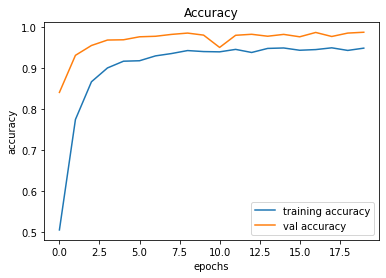

In [17]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

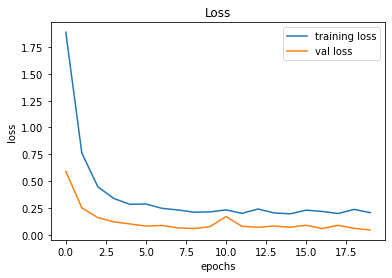

In [18]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
#Kiểm tra với data test
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [20]:
X_test, label = testing('Test.csv')

In [21]:
Y_pred = model.predict_classes(X_test)
Y_pred

C:\Users\Wind\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [22]:
#Đo độ chính xác của model
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9619952494061758


In [23]:
#lưu model
model.save("./training/TSR.h5")

In [1]:
#load model
import os
os.chdir(r'C:/Users/Wind/TrafficSign-Classification-CNN')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [2]:
# Classes of trafic signs
classes = { 0 : 'Giới hạn tốc độ (20km / h)' , 
            1 : 'Giới hạn tốc độ (30km / h)' ,
            2 : 'Giới hạn tốc độ (50km / h)' ,
            3 : 'Giới hạn tốc độ (60km / h)' ,
            4 : 'Giới hạn tốc độ (70km / h)' ,
            5 : 'Giới hạn tốc độ (80km / h)' ,
            6 : 'Hết tốc độ giới hạn (80km / h)' ,
            7 : 'Giới hạn tốc độ (100km / h)' ,
            8 : 'Giới hạn tốc độ (120km / h)' ,
            9 : 'Không vượt qua' ,
            10 : 'Không vượt quá 3,5 tấn' ,
            11 : 'Quyền ưu tiên tại giao lộ' ,
            12 : 'Đường ưu tiên' ,
            13 : 'Năng suất' ,
            14 : 'Dừng lại' ,
            15 : 'Không có xe cộ' ,
            16 : 'Veh> 3,5 tấn bị cấm' ,
            17 : 'Không vào' ,
            18 : 'Thận trọng chung' ,
            19 : 'Đường cong nguy hiểm sang trái' ,
            20 : 'Đường cong nguy hiểm bên phải' ,
            21 : 'Đường cong kép' ,
            22 : 'Con đường gập ghềnh' ,
            23 : 'Đường trơn trượt' ,
            24 : 'Đường thu hẹp bên phải' ,
            25 : 'Làm đường' ,
            26 : 'Tín hiệu giao thông' ,
            27 : 'Người đi bộ' ,
            28 : 'Trẻ em băng qua đường' ,
            29 : 'Xe đạp băng qua đường' ,
            30 : 'Cẩn thận với băng / tuyết' ,
            31 : 'Động vật hoang dã băng qua' ,
            32 : 'Tốc độ cuối + giới hạn vượt qua' ,
            33 : 'Rẽ phải về phía trước' ,
            34 : 'Rẽ trái phía trước' ,
            35 : 'Chỉ phía trước' ,
            36 : 'Đi thẳng hoặc sang phải' ,
            37 : 'Đi thẳng hoặc sang trái' ,
            38 : 'Đi bên phải' ,
            39 : 'Đi bên trái' ,
            40 : 'Bắt buộc đi đường vòng' ,
            41 : 'Kết thúc không có vượt qua' ,
            42 : 'Trọng tải không quá 3,5 tấn' } 

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

C:\Users\Wind\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Biển báo giao thông được dự đoán là:  Giới hạn tốc độ (50km / h)


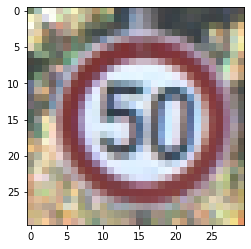

In [4]:
plot,prediction = test_on_img(r'C:\Users\Wind\TrafficSign-Classification-CNN\Test\00034.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Biển báo giao thông được dự đoán là: ", classes[a])
plt.imshow(plot)
plt.show()